In [1]:
import qexpy as q
import qexpy.plotting as plt
import numpy as np


In [2]:
#medidas ec. Gauss -experimento 1-

Xs1 = np.asarray([137.0,57.0,52.4,52.7,56.2,59.5,63.8,67.4,72.7,76.7,81.6,52.9])-1.4;
Xs2 = np.asarray([149.0,58.0,53.2,53.2,56.3,59.6,63.85,67.5,72.8,76.8,81.7,53.0])-1.4;
Xs3 = np.asarray([158.0,58.5,53.4,53.5,56.4,59.7,63.9,67.5,72.9,79.9,81.8,53.1])-1.4;

epsilon1 = Xs2-Xs1; epsilon2 = Xs3-Xs2; eps =(epsilon1+epsilon2)/2;

Xs = q.MeasurementArray([16.5+5*i-1.4 for i in range(11)]+[30.5-1.4], 0.5, units = "cm");
Xsprima = q.MeasurementArray(Xs2-Xs,eps, units = "cm");



#medidas ec. Newton -experimento 2-

Xss1 = np.asarray([137.0,57.0,52.4,52.7,56.2,59.5])-1.4;
Xss2 = np.asarray([149.0,58.0,53.2,53.2,56.3,59.6])-1.4;
Xss3 = np.asarray([158.0,58.5,53.4,53.5,56.4,59.7])-1.4;

epsilon11 = Xss2-Xss1; epsilon22 = Xss3-Xss2; epss =(epsilon11+epsilon22)/2;

Xss = q.MeasurementArray(np.asarray([16.5+5*i for i in range(6)])-1.4, 0.5, units = "cm");
Xssprima = q.MeasurementArray(Xss2-Xss,epss, units = "cm");
yprima  = q.MeasurementArray([4.0,0.9,0.5,0.3,0.2,0.1],0.2, units = "cm");
y = q.Measurement(0.4,0,units = "cm");


/home/santi/miniconda/lib/python3.9/site-packages/qexpy/data/data.py:798: UserWarning: You are trying to override the propagated error of a derived quantity. This value is casted to a regular Measurement
  warnings.warn(


In [4]:
print(Xss)
print(yprima)

[ 15.1 +/- 0.5, 20.1 +/- 0.5, 25.1 +/- 0.5, 30.1 +/- 0.5, 35.1 +/- 0.5, 40.1 +/- 0.5 ]
[ 4.0 +/- 0.2, 0.9 +/- 0.2, 0.5 +/- 0.2, 0.3 +/- 0.2, 0.2 +/- 0.2, 0.1 +/- 0.2 ]


In [3]:
print(Xs)
print(Xsprima)

[ 15.1 +/- 0.5, 20.1 +/- 0.5, 25.1 +/- 0.5, 30.1 +/- 0.5, 35.1 +/- 0.5, 40.1 +/- 0.5, 45.1 +/- 0.5, 50.1 +/- 0.5, 55.1 +/- 0.5, 60.1 +/- 0.5, 65.1 +/- 0.5, 29.1 +/- 0.5 ]
[ 130 +/- 10, 36.5 +/- 0.8, 26.7 +/- 0.5, 21.7 +/- 0.4, 19.8 +/- 0.1, 18.1 +/- 0.1, 17.35 +/- 0.05, 16.00 +/- 0.05, 16.3 +/- 0.1, 15 +/- 2, 15.2 +/- 0.1, 22.5 +/- 0.1 ]


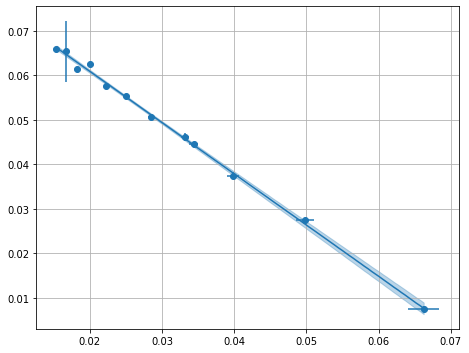

----------------- Fit Results -------------------
Fit of Verificación de la ecuación de Gauss to linear

Result Parameter List: 
slope = -1.15 +/- 0.03,
intercept = 0.0839 +/- 0.0009

Correlation Matrix: 
[[ 1.    -0.946]
 [-0.946  1.   ]]

chi2/ndof = 113.92/9

--------------- End Fit Results -----------------
11.9 +/- 0.1


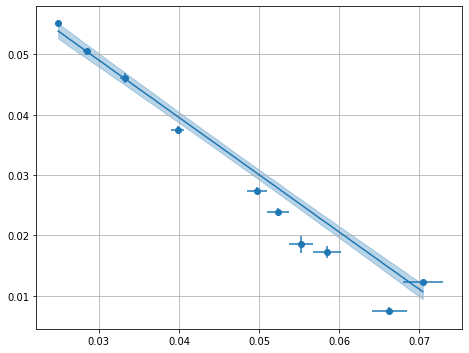

----------------- Fit Results -------------------
Fit of Verificación de la ecuación de Gauss to linear

Result Parameter List: 
slope = -0.95 +/- 0.04,
intercept = 0.078 +/- 0.002

Correlation Matrix: 
[[ 1.    -0.924]
 [-0.924  1.   ]]

chi2/ndof = 335.13/7

--------------- End Fit Results -----------------
12.9 +/- 0.4


In [15]:
fig1 = plt.plot(1/Xs,1/Xsprima, name = "Verificación de la ecuación de Gauss") 
result1 = fig1.fit(model = q.FitModel.LINEAR)
plt.show()
print(result1)
print(1/result1[1])

fig2 = plt.plot(1/Xss,1/Xssprima, name = "Verificación de la ecuación de Gauss") 
result2 = fig2.fit(model = q.FitModel.LINEAR)
plt.show()
print(result2)
print(1/result2[1])

In [5]:
def hprima(Y,Yprima):
    return -Yprima/Y; 
def func(x,a,b):
    return a/(b+x);

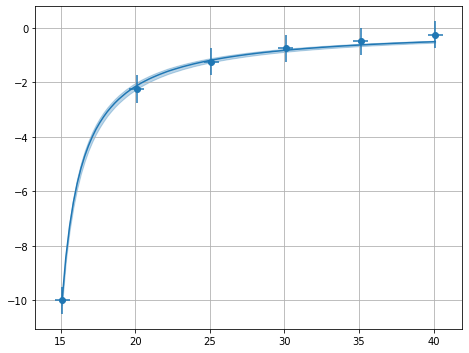

----------------- Fit Results -------------------
Fit of Ecuación de Newton to custom

Result Parameter List: 
a = -14 +/- 1,
b = -13.7 +/- 0.1

Correlation Matrix: 
[[ 1.    -0.976]
 [-0.976  1.   ]]

chi2/ndof = 0.44/3

--------------- End Fit Results -----------------
-13.6 +/- 0.5


In [6]:
xdats = Xss
ydats = hprima(y,yprima)

figure3 = plt.plot(xdats,ydats, name  = "Ecuación de Newton")
result3 = figure3.fit(model=func, parguess = [12,12])
plt.show()
print(result3)
print(q.mean([result3[0],result3[1]]))
